#  Module 8- Final Project for  Spatial and Geostatistical analysis on analyzing the spatial trends of Harmful bloom Algae events in Florida

### Story: 

For my final project for this course I have selected the event of Harmful Bloom Algae which is phytoplankton Karenia brevis that has been sourced from Florida fish and wildlife Conservation from year 2015 through the most recently available period.I am really keen on analyzing and understanding the spatial distribution of Karenia Brevis( Harmful bloom algae) in Florida as Florida is also know as a red tide area. This is vital to be analysed as Karenia Brevis are known to produce toxins in water that harms marine ecosystem which effect the health of marine life. As this spoils the quality of water its becomes very harmful for huma life as well. I am planning to conduct different spatial analysis methods and apply them to understand hot spots and cold spots of these Harmful bloom algae using Spatial autocorrelation. Additionally I plan to understand the spatial distribution of the algae by conducting point pattern quadrant analysis. With this project it helps understand the hot spots where this HAB is clustered which can guide the public health Authorities, fisheries to take protective measures and minimize the impact of Karenia Brevis for improving water quality.

### Intended audience:

1. Environmental scientists who might use this data to further investigate their research on HAB's 
2. Public health authorities and water quality monitoring agents can utilise the data to take preventive and protective measures to minimize the impact of Karenia Brevis for improving water quality.
3. Marine Conservationists can use the data to understand the HAB pattern to advocate for the protection of marine life.
4. Residents of Florida and recreational users can decide the usage of water bodies based on the quality of water.

### Data

All the required data and shapefiles have been uploded in Module 8 folder

https://europa.dsa.missouri.edu/user/nkndc/tree/sp24dsa8520_nkndc/module8

### Installing required libraries

In [1]:
pip install pysal==2.0.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install esda

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install splot --ignore-installed 

  Using cached splot-1.1.5.post1-py3-none-any.whl.metadata (8.8 kB)
  Using cached esda-2.4.3-py3-none-any.whl
  Using cached geopandas-0.10.2-py2.py3-none-any.whl.metadata (935 bytes)
  Using cached giddy-2.3.4-py3-none-any.whl.metadata (6.5 kB)
  Using cached libpysal-4.7.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached mapclassify-2.6.0-py3-none-any.whl.metadata (11 kB)
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (6.7 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (2.1 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached spreg-1.3.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached shapely-2.0.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.0 kB)
  Using cached fiona-1.9.6-cp37-cp37m-manylinux2014_x86_64.whl.metadata (50 kB

Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
Using cached platformdirs-4.0.0-py3-none-any.whl (17 kB)
Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
Using cached charset_normalizer-3.3.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (136 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached idna-3.6-py3-none-any.whl (61 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached MarkupSafe-2.1.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
Using cached numba-0.56.4-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
U

### Importing the required libraries

In [4]:
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pysal.explore import esda

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /

### Reading the dataset

In [5]:
df_hab=gpd.read_file("hab.shp")

In [6]:
df_hab

,OBJECTID,SAMPLE_DAT,TIMEZONE,DEPTH,LOCATION,LATITUDE,LONGITUDE,NAME,COUNT_,HAB_ID,geometry
0,11494250,2015-01-05,GMT,0.5,Clearwater Pass,27.96035,-82.82430,Karenia brevis,0,HABW150105-003,POINT (-82.82430 27.96035)
1,11494251,2015-01-05,GMT,0.5,Redington Pier,27.82240,-82.83130,Karenia brevis,0,HABW150105-004,POINT (-82.83130 27.82240)
2,11494252,2015-01-05,GMT,0.5,Mullet Key; Gulf Pier,27.61330,-82.73910,Karenia brevis,0,HABW150105-005,POINT (-82.73910 27.61330)
3,11494253,2015-01-05,GMT,0.5,Skyway Fishing Pier; South (Lower Tampa Bay),27.60550,-82.65080,Karenia brevis,0,HABW150105-006,POINT (-82.65080 27.60550)
4,11494254,2015-01-05,GMT,0.5,Fletcher Point (Lower Tampa Bay),27.58512,-82.61482,Karenia brevis,0,HABW150105-007,POINT (-82.61482 27.58512)
...,...,...,...,...,...,...,...,...,...,...,...
88000,11582250,2024-02-19,EST,0.5,La Contessa Pier,27.81210,-82.81915,Karenia brevis,0,HABW240219-032,POINT (-82.81915 27.81210)
88001,11582251,2024-02-19,EST,0.5,Mullet Key; Gulf Pier,27.61330,-82.73910,Karenia brevis,0,HABW240219-033,POINT (-82.73910 27.61330)
88002,11582252,2024-02-19,EST,0.1,Wallace Cove (Boca Ciega Bay),27.71170,-82.69014,Karenia brevis,0,HABW240219-034,POINT (-82.69014 27.71170)
88003,11582253,2024-02-19,EST,0.2,Via Cipriani; dock S of (Old Tampa Bay),27.94067,-82.72250,Karenia brevis,0,HABW240219-035,POINT (-82.72250 27.94067)


### As HAB concentrations over 10,000 cells/litre can pose threat to Marine ecosystem and water quality I decided to filter the dataset to only focus on significant occurences by assigning a presence_hab value to 1 when count_ is more than 10,000 cells/litre and presence_hab value to 0 for lesser than 10,000 cells/litre. For this i created the columns Cat that says thee decription based on cells count and another column that shows the binary classificatio  of presence_hab

In [7]:
def cat_hab_counts(count):
    if count > 1000000:
        return 'High'  
    elif count > 100000:
        return 'Medium'  
    elif count > 10000:
        return 'Low'  
    elif count > 1000:
        return 'Very Low'  
    else:
        return 'Background'  
df_hab['cat']=df_hab['COUNT_'].apply(cat_hab_counts)
df_hab['presence_hab']= df_hab['cat'].apply(lambda x:1 if x in ['low','Medium','High']else 0)

In [8]:
df_hab

,OBJECTID,SAMPLE_DAT,TIMEZONE,DEPTH,LOCATION,LATITUDE,LONGITUDE,NAME,COUNT_,HAB_ID,geometry,cat,presence_hab
0,11494250,2015-01-05,GMT,0.5,Clearwater Pass,27.96035,-82.82430,Karenia brevis,0,HABW150105-003,POINT (-82.82430 27.96035),Background,0
1,11494251,2015-01-05,GMT,0.5,Redington Pier,27.82240,-82.83130,Karenia brevis,0,HABW150105-004,POINT (-82.83130 27.82240),Background,0
2,11494252,2015-01-05,GMT,0.5,Mullet Key; Gulf Pier,27.61330,-82.73910,Karenia brevis,0,HABW150105-005,POINT (-82.73910 27.61330),Background,0
3,11494253,2015-01-05,GMT,0.5,Skyway Fishing Pier; South (Lower Tampa Bay),27.60550,-82.65080,Karenia brevis,0,HABW150105-006,POINT (-82.65080 27.60550),Background,0
4,11494254,2015-01-05,GMT,0.5,Fletcher Point (Lower Tampa Bay),27.58512,-82.61482,Karenia brevis,0,HABW150105-007,POINT (-82.61482 27.58512),Background,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88000,11582250,2024-02-19,EST,0.5,La Contessa Pier,27.81210,-82.81915,Karenia brevis,0,HABW240219-032,POINT (-82.81915 27.81210),Background,0
88001,11582251,2024-02-19,EST,0.5,Mullet Key; Gulf Pier,27.61330,-82.73910,Karenia brevis,0,HABW240219-033,POINT (-82.73910 27.61330),Background,0
88002,11582252,2024-02-19,EST,0.1,Wallace Cove (Boca Ciega Bay),27.71170,-82.69014,Karenia brevis,0,HABW240219-034,POINT (-82.69014 27.71170),Background,0
88003,11582253,2024-02-19,EST,0.2,Via Cipriani; dock S of (Old Tampa Bay),27.94067,-82.72250,Karenia brevis,0,HABW240219-035,POINT (-82.72250 27.94067),Background,0


## ESDA (Exploratory Spatial Data analysis)

### Visualizing the distributions of presence and absence of Hab

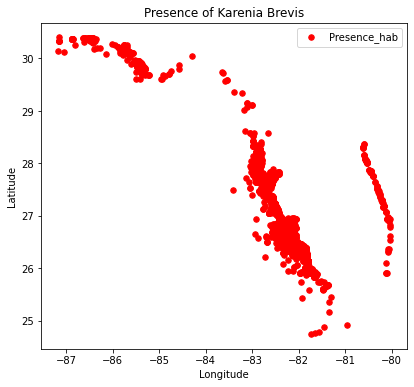

In [9]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
df_hab[df_hab['presence_hab'] == 1].plot(ax=ax, marker='o', color='red', markersize=30, label='Presence_hab')
#df_hab[df_hab['presence_hab'] == 0].plot(ax=ax, marker='*', color='blue', markersize=20, label='Absence_hab')
plt.legend()
plt.title('Presence of Karenia Brevis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


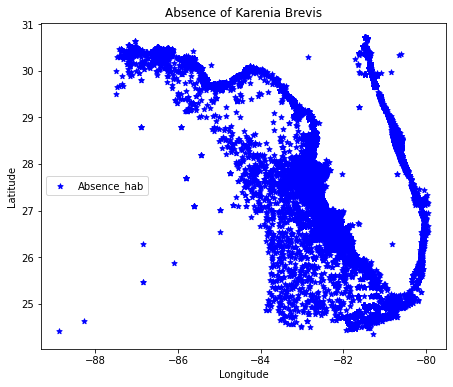

In [10]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
#df_hab[df_hab['presence_hab'] == 1].plot(ax=ax, marker='o', color='red', markersize=50, label='Presence_hab')
df_hab[df_hab['presence_hab'] == 0].plot(ax=ax, marker='*', color='blue', markersize=30, label='Absence_hab')
plt.legend()
plt.title('Absence of Karenia Brevis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


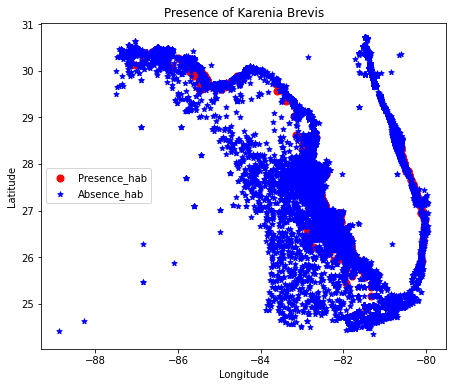

In [11]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
df_hab[df_hab['presence_hab'] == 1].plot(ax=ax, marker='o', color='red', markersize=50, label='Presence_hab')
df_hab[df_hab['presence_hab'] == 0].plot(ax=ax, marker='*', color='blue', markersize=30, label='Absence_hab')
plt.legend()
plt.title('Presence of Karenia Brevis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Visualizing the presence_hab when it's value is 1(showing the presence of Karenia Brevis with more than 10,000 cells/litre) using Heat Map using kernal density estimate plot

### Statistics of Presence_hab column

In [12]:
df_hab["presence_hab"].describe()

count    88005.000000
mean         0.061792
std          0.240779
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: presence_hab, dtype: float64

## Spatial Autocorrelation

Setting the Stage for performing Auto Correlation on presence_hab column that will be helpful to analyse the hotspots and cold spots as they would show if they are high are clustered with high or low 

#### Setting the presence_hab column index of the dataframe df_hab which is useful for performing subsequent data operation that might require index based actions

In [13]:
df_db_hab = df_hab.set_index("presence_hab", drop=False)

#### In order to reterive the current CRS to ensure that the spatial data is properly georeferenced

In [14]:

df_db_hab.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### finding the number of rows and columns in the dataframe to ensure that datasize is as expected 

In [15]:
len(df_db_hab.index)

88005

### Applying the KNN algorithm to calculate spatial weights to understand the spatial relationship between points with distance 

In [16]:

df_db_hab.reset_index(drop=True, inplace=True)


df_db_hab.crs = "EPSG:4326"  


from libpysal.weights import KNN

# Number of nearest neighbors
k = 30


w_knn = KNN.from_dataframe(df_db_hab, k=k)

# Check the resulting weights matrix
print(w_knn.histogram)


[(30, 88005)]


/opt/conda/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 87 disconnected components.
  warnings.warn(message)


In the above code KNN was used to create spatial weights matrix in order to capture the spatial relationships in the dataset. By setting K=30 we determine that each point in the dataset should be in co-occurence with its 30 nearest neighbors. This approach is helpful as it helps to understand the local neighbourhood. Choosing appropriate K value is important  it should have a balance between too much coarseness with smaller K value and too much sparse with higher K value.

Now calculating a **global measure** of spatial autocorrelation - **Moran's I** 

In [17]:
morani_hab = esda.Moran(df_db_hab['presence_hab'], w_knn)
morani_hab

In [18]:
round(morani_hab.I, 4)

0.0701

In [19]:
morani_hab.p_sim

0.001

### LISA Local Spatial Autocorrelation for presence_hab column


Lisa statisitics is helpful to reveal weather HAB events are clustered and where they are located . LISA provides location specific insights which is great for searching hotspots 

#### The esda.Moran_local function helps in calculating the local Moran I value for each location in the dataset

In [20]:
lisa = esda.Moran_Local(df_db_hab['presence_hab'], w_knn)

#### next code line creates a boolean mask to identify which Moran I values are significant with p value less than 0.05

In [21]:
df_db_hab['significant'] = lisa.p_sim < 0.05

#### "df_db_hab['quad'] = lisa.q" This asigns a quadrant value for each observation

In [22]:
df_db_hab['quad'] = lisa.q

#### In LISA, the quadrant represents types of local spatial associations, In below code we label them as HH( Locations with high values is surrounded by neighbors with high values in our case presence_hab with value 1 surrounds with another presence_hab with value 1- they are mainly the hotspots where this Karenia Brevis is significant), HL (1 with 0), LH( 0 with 1), LL(0 with 0 values- these are cold spots where there are low chances of them being present)

In [23]:

spots = lisa.p_sim < 0.05

#Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}

df_db_hab["labels"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=df_db_hab.index
    
).map(spots_labels)
# Print top for inspection
df_db_hab["labels"].value_counts()

Series([], Name: labels, dtype: int64)

In [24]:
df_db_hab['significant']

0        False
1        False
2        False
3        False
4        False
         ...  
88000     True
88001    False
88002    False
88003    False
88004    False
Name: significant, Length: 88005, dtype: bool

In [25]:
df_db_hab['quad'].head()

0    3
1    3
2    3
3    2
4    3
Name: quad, dtype: int64

<AxesSubplot:>

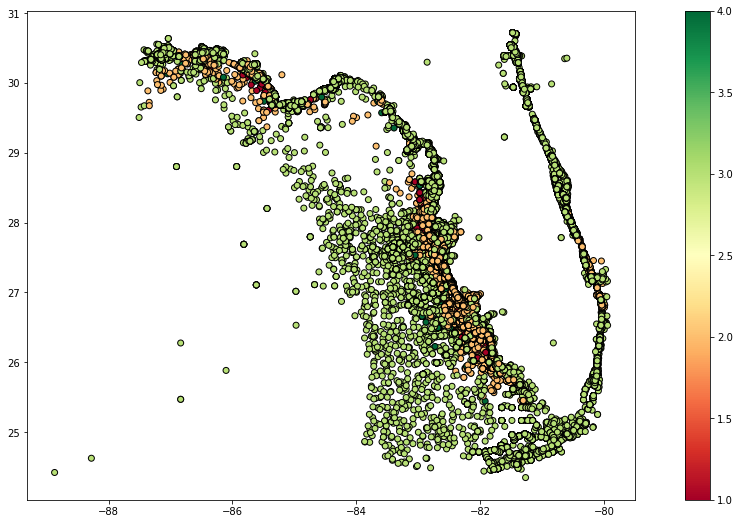

In [26]:
df_db_hab.plot(column='quad', cmap='RdYlGn', edgecolor='k', legend = True, figsize = [18,9])

## Point Pattern Analysis using Quadrant analysis

Point pattern analysis is conducted as it is useful for showing the distribution of karenia Brevis which helps us understand the spatial patterns and trends of the HAB ( Harmful Bloom Algae- Karenia Brevis). This analysis can help reserchers examine and correlate with environmental variables such as water nitrogen content as a high nitrogen content also is responsible for the growth of karenia Brevis. The point pattern was done only when presence_hab column value is 1. Since that helps to underand the presence distribution.

In [27]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install libpysal pointpats

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
### Mean centre 

Mean centre is useful for for finding the central tendency, that offers a quick visual refernce where the middle of distribution of this Algae lies

/opt/conda/lib/python3.7/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


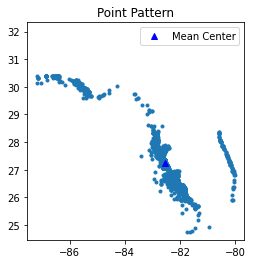

In [31]:
import pandas as pd
from pointpats import PointPattern
from pointpats.centrography import mean_center
import matplotlib.pyplot as plt

hab_presence_1 = df_hab[df_hab['presence_hab'] == 1]

hab_array= hab_presence_1[['LONGITUDE', 'LATITUDE']]

# Creating Point Pattern
pp_hab = PointPattern(hab_array)

# Calculating Mean Center
mean_hab = mean_center(pp_hab.points)


pp_hab.plot()
plt.plot(mean_hab[0], mean_hab[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)
plt.axis('square')
plt.show()



In [32]:
print(hab_presence_1.crs)

epsg:4326


In [33]:
hab_presence_1

,OBJECTID,SAMPLE_DAT,TIMEZONE,DEPTH,LOCATION,LATITUDE,LONGITUDE,NAME,COUNT_,HAB_ID,geometry,cat,presence_hab
4175,11498425,2015-09-30,GMT,0.5,St. Andrew Pass,30.125000,-85.724000,Karenia brevis,170000,HABW151001-005,POINT (-85.72400 30.12500),Medium,1
4177,11498427,2015-09-30,GMT,0.5,Earl Gilbert Park Boat Ramp (East Bay),30.105160,-85.604010,Karenia brevis,449167,HABW151001-007,POINT (-85.60401 30.10516),Medium,1
4193,11498443,2015-09-30,None,0.5,Panama City Beach; 2.8 mi SW of,30.138833,-85.829833,Karenia brevis,969333,HABW151001-023,POINT (-85.82983 30.13883),Medium,1
4200,11498450,2015-09-30,None,0.5,St. Andrews Pass (St. Andrew Bay),30.118650,-85.732108,Karenia brevis,10883333,HABW151002-007,POINT (-85.73211 30.11865),High,1
4233,11498483,2015-10-05,GMT,0.5,Military Point; W of (East Bay),30.124111,-85.631000,Karenia brevis,322333,HABW151006-002,POINT (-85.63100 30.12411),Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81589,11575839,2021-07-14,EDT,0.5,Albee Road Bridge; N of (Blackburn Bay),27.127880,-82.469350,Karenia brevis,184000,HABW230615-026,POINT (-82.46935 27.12788),Medium,1
81591,11575841,2021-07-14,EDT,0.5,Lyons Bay,27.120000,-82.463400,Karenia brevis,1850000,HABW230615-028,POINT (-82.46340 27.12000),High,1
81593,11575843,2021-07-14,EDT,0.5,Bird Island; S of (Roberts Bay; Venice),27.107900,-82.458400,Karenia brevis,1660000,HABW230615-030,POINT (-82.45840 27.10790),High,1
81594,11575844,2021-07-14,EDT,0.5,Roberts Bay; Nokomis,27.110300,-82.456300,Karenia brevis,117000,HABW230615-031,POINT (-82.45630 27.11030),Medium,1


### Standard distance circle

The standard distance circle helps since it shows a spread of the data around the mean centre 

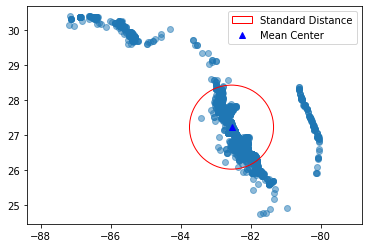

In [34]:
import matplotlib.pyplot as plt
from pointpats.centrography import mean_center, std_distance
std_dist_hab = std_distance(pp_hab.points)
fig, ax = plt.subplots()
ax.scatter(hab_presence_1['LONGITUDE'], hab_presence_1['LATITUDE'], alpha=0.5)


circle = plt.Circle(mean_hab, std_dist_hab, edgecolor='red', facecolor='none', label='Standard Distance')
ax.add_patch(circle)

ax.plot(mean_hab[0], mean_hab[1], 'b^', label='Mean Center')

ax.legend()
plt.axis('equal') 
plt.show()


### Visualizing the presence_hab when it's value is 1(showing the presence of Karenia Brevis with more than 10,000 cells/litre) using Heat Map using kernal density estimate plot

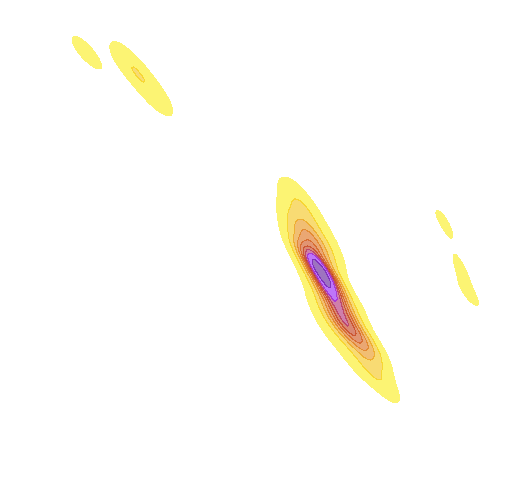

In [35]:
import seaborn as sbn
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

sbn.kdeplot(x=hab_presence_1["LONGITUDE"], y=hab_presence_1["LATITUDE"], fill=True, alpha=0.55, cmap="gnuplot_r")

# Remove axes
ax.set_axis_off()
plt.show()

### Quadrant Analysis

Quadrant analysis is employed since it s a vital tool for understanding the spatial extent and concentrations of HAB's by breaking down the whole aread into quadrant. This lets us see Granular form and count of the presence of Karenia Brevis

Scale: 3
Chi-Squared Statistic: 13334.520411916146
Degrees of Freedom: 8
P-Value: 0.0


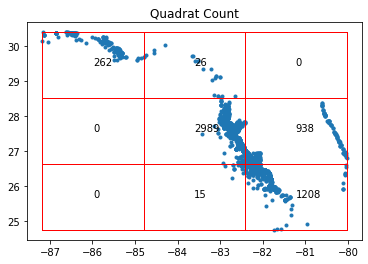

In [36]:
import pointpats.quadrat_statistics as qs
scale = 3


quad = qs.QStatistic(pp_hab, shape="rectangle", nx=scale, ny=scale)


chi2_statistic = quad.chi2
degrees_of_freedom = quad.df
p_value = quad.chi2_pvalue


print(f"Scale: {scale}")
print(f"Chi-Squared Statistic: {chi2_statistic}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value}")

quad.plot()

plt.show()

Scale: 5
Chi-Squared Statistic: 50083.4600956234
Degrees of Freedom: 24
P-Value: 0.0


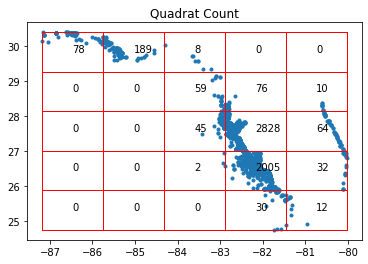

In [37]:
import pointpats.quadrat_statistics as qs
scale = 5


quad = qs.QStatistic(pp_hab, shape="rectangle", nx=scale, ny=scale)


chi2_statistic = quad.chi2
degrees_of_freedom = quad.df
p_value = quad.chi2_pvalue


print(f"Scale: {scale}")
print(f"Chi-Squared Statistic: {chi2_statistic}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value}")

quad.plot()

plt.show()

Scale: 7
Chi-Squared Statistic: 76295.96432511954
Degrees of Freedom: 48
P-Value: 0.0


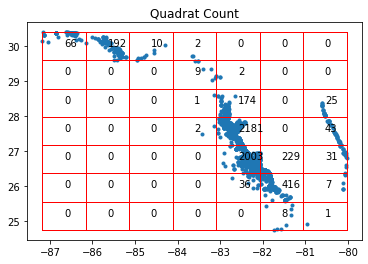

In [38]:
import pointpats.quadrat_statistics as qs
scale = 7 


quad = qs.QStatistic(pp_hab, shape="rectangle", nx=scale, ny=scale)


chi2_statistic = quad.chi2
degrees_of_freedom = quad.df
p_value = quad.chi2_pvalue


print(f"Scale: {scale}")
print(f"Chi-Squared Statistic: {chi2_statistic}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value}")

quad.plot()

plt.show()

## Conducting the Ripley’s G test to discover how similar the HAB pattern is to a spatially random one

In [39]:
from pointpats import (distance_statistics, random, PointPattern)

In [40]:
hab1_g = pd.DataFrame(hab_presence_1, columns = ['LONGITUDE','LATITUDE'])

In [41]:

g_test = distance_statistics.g_test(hab1_g, support=10, keep_simulations=True)

g_test

GtestResult(support=array([0.        , 0.04909547, 0.09819095, 0.14728642, 0.1963819 ,
       0.24547737, 0.29457284, 0.34366832, 0.39276379, 0.44185926]), statistic=array([0.        , 0.98510482, 0.99485105, 0.99724163, 0.99852887,
       0.99908054, 0.99944833, 0.99963222, 0.99981611, 1.        ]), pvalue=array([0.    , 0.0001, 0.0001, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    ]), simulations=array([[0.        , 0.63773446, 0.98326591, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.63534388, 0.98105921, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.63332107, 0.98308202, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.63111438, 0.98050754, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.63368886, 0.97977197, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.63497609, 0.98161089, ..., 1.        , 1.        ,
        1.        ]]))